## Spam Detection System: A Naive Bayes Approach

In [51]:
!pip install nltk

In [117]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 245.8 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/300.2 kB 357.2 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 654.6 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.2 kB 846.9 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 926.3 kB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"D:/.csv/spam.csv",encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
956,ham,"Love isn't a decision, it's a feeling. If we c...",NaN,NaN,NaN
380,ham,I guess that's why you re worried. You must kn...,NaN,NaN,NaN
4813,ham,Ummmmmaah Many many happy returns of d day my ...,NaN,NaN,NaN
5082,ham,Amazing : If you rearrange these letters it gi...,NaN,NaN,NaN
5125,ham,After my work ah... Den 6 plus lor... U workin...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(5)

,v1,v2
5032,ham,* Was really good to see you the other day dud...
4252,ham,Juz now havent woke up so a bit blur blur... C...
530,spam,PRIVATE! Your 2003 Account Statement for 07815...
2327,spam,URGENT! Your mobile number *************** WON...
5402,ham,Hi babe its me thanks for coming even though i...


In [7]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2851,ham,how tall are you princess?
187,spam,Please call our customer service representativ...
1387,ham,Hope ur head doesn't hurt 2 much ! Am ploughin...
3944,ham,I will be gentle princess! We will make sweet ...
2292,ham,:-( that's not v romantic!


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#check for duplicate values
df.duplicated().sum()

403

In [13]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

## 2.EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

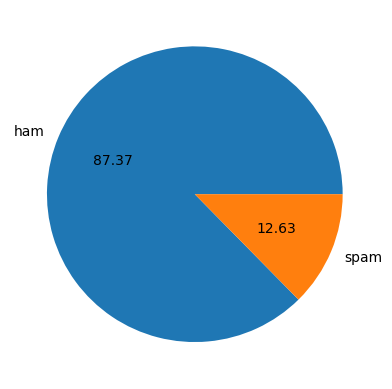

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siyam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siyam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters']=df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# fetching num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

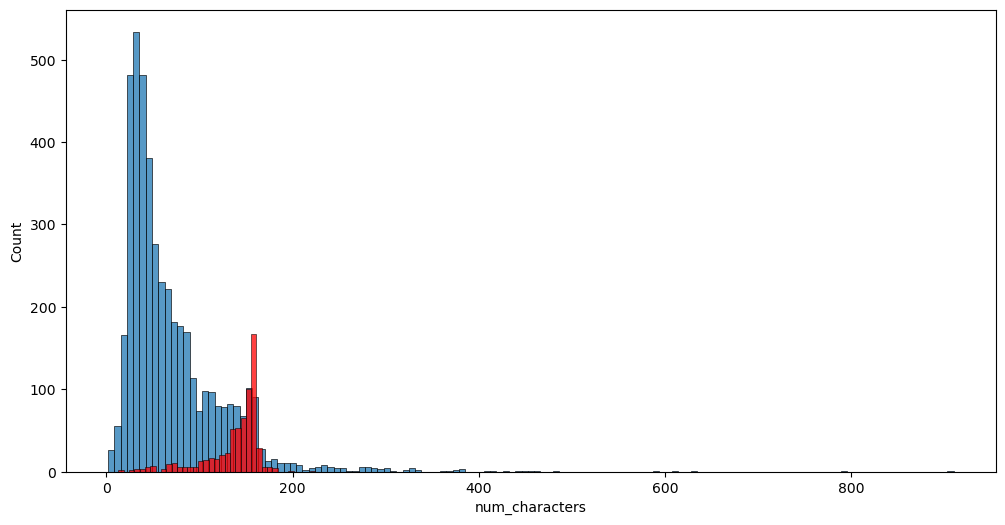

In [31]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

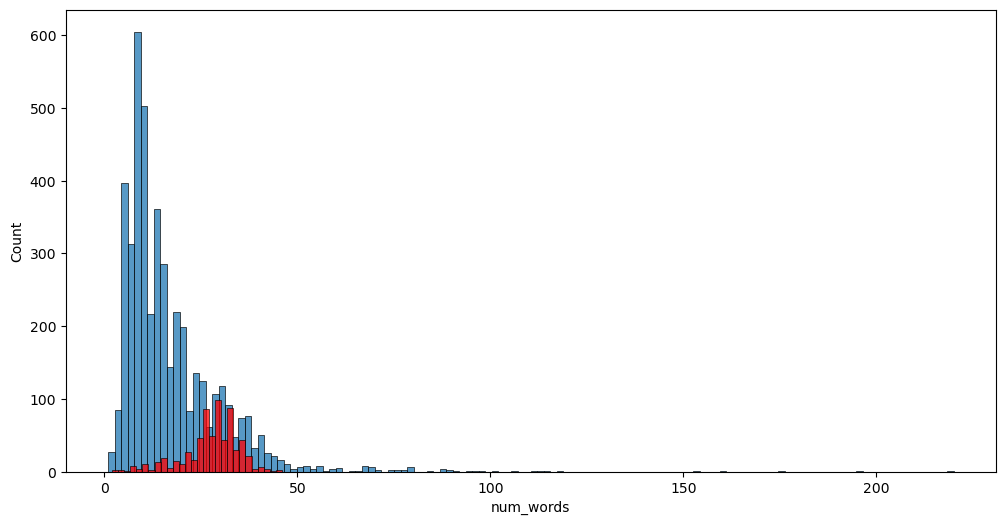

In [32]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

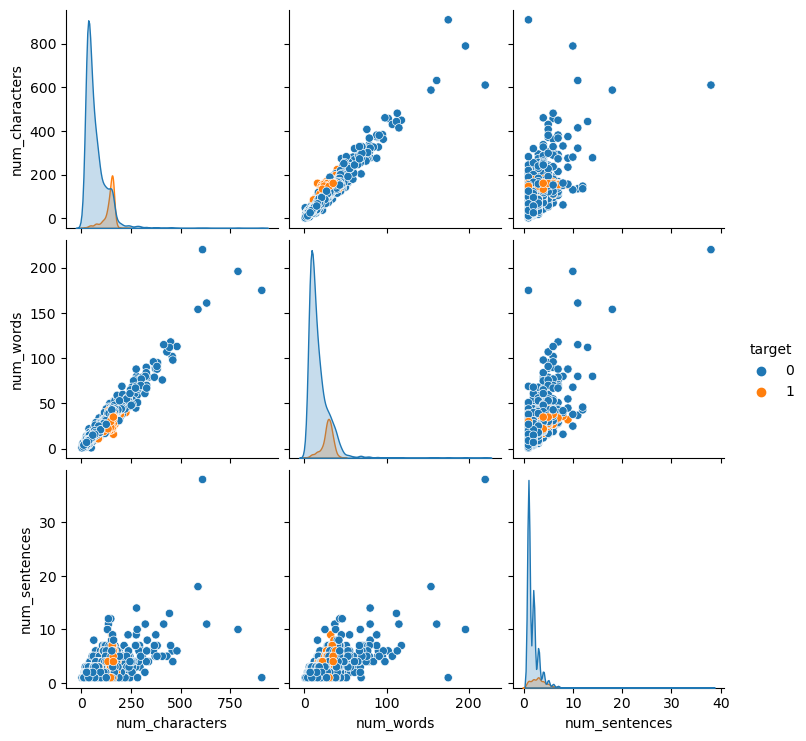

In [33]:
sns.pairplot(df,hue='target')

C:\Users\siyam\AppData\Local\Temp\ipykernel_11364\31118702.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

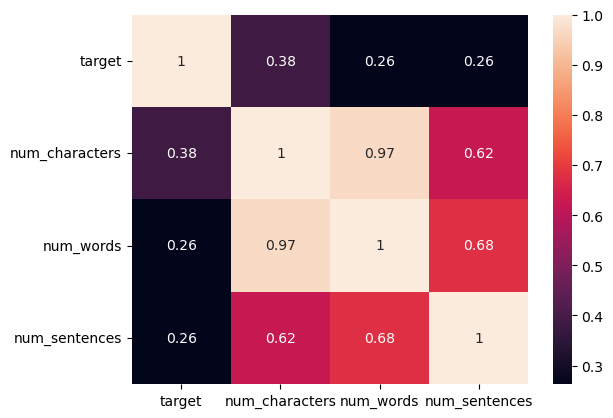

In [34]:
#plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

## 3.Data Preprocessing

In [35]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)


In [36]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud

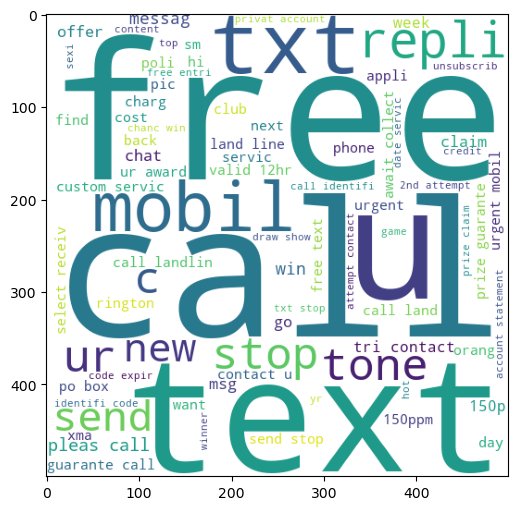

In [40]:
#form spam
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

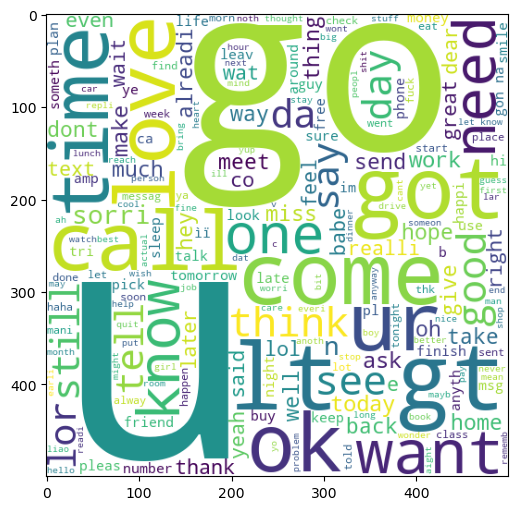

In [41]:
#for ham
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

In [42]:
#Find top 30 words of spam
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [43]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

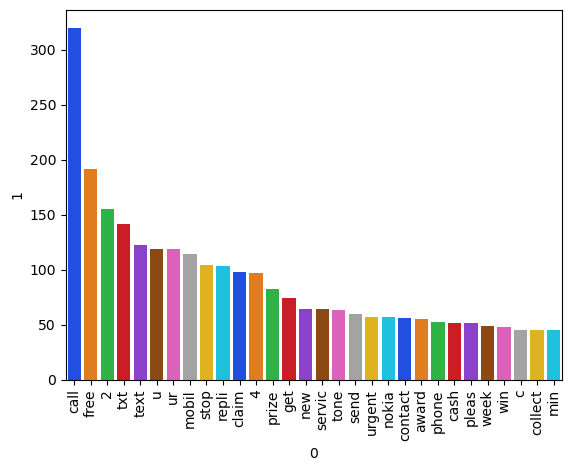

In [44]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [45]:
#Find top 30 words of Not spam Messages
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [46]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

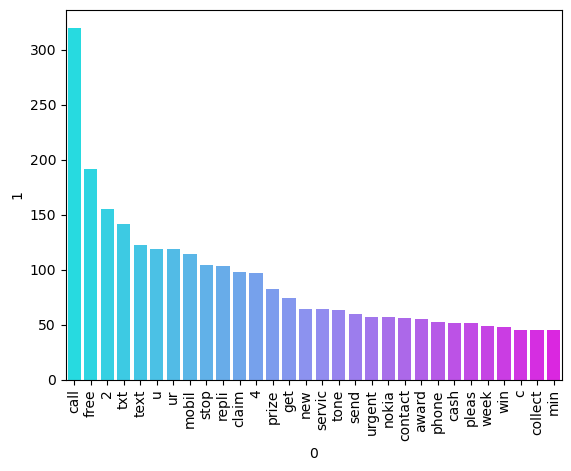

In [47]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

## 4.Model Building

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [49]:
X = cv.fit_transform(df['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
X.shape

(5169, 6708)

In [51]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
messages = np.array(['spam message 1', 'non-spam message 1', 'spam message 2', 'non-spam message 2'])
labels = np.array([1, 0, 1, 0])  # Assuming 1 represents spam and 0 represents non-spam

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [55]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [56]:
y_pred=mnb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
print('Confusion Matrix  : \n',metrics.confusion_matrix(y_test,y_pred))
print('Accuracy : ',metrics.accuracy_score(y_test,y_pred))
print('Precision : ',metrics.precision_score(y_test,y_pred))
print('Recall : ',metrics.recall_score(y_test,y_pred))
print('F1_Score : ',metrics.f1_score(y_test,y_pred))
print('\n',metrics.classification_report(y_test,y_pred))

Confusion Matrix  : 
 [[871  25]
 [ 12 126]]
Accuracy :  0.9642166344294004
Precision :  0.8344370860927153
Recall :  0.9130434782608695
F1_Score :  0.8719723183391004

               precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.83      0.91      0.87       138

    accuracy                           0.96      1034
   macro avg       0.91      0.94      0.93      1034
weighted avg       0.97      0.96      0.96      1034



In [58]:
# Take user input
user_input = input('Enter a message to check for spam:\n')

# Vectorize the user input
user_input_vectorized = cv.transform([user_input])

# Make predictions on the user input
prediction = mnb.predict(user_input_vectorized)

# Convert the numeric prediction to 'spam' or 'ham'
result_label = 'spam' if prediction[0] == 1 else 'not spam'

print("\nPrediction Result:")
print("-" * 30)
print(f"Entered Message: '{user_input}'")
print(f"\nPrediction:      '\033[1m{result_label.upper()}\033[0m'\n")

Enter a message to check for spam:
Dear 92840758XX  Prize Pool: 4,00,00,000 (4 Cr)*   Enter RummyCircle's 101 Pool Rumble now:  http://gmg.im/bPdilq   Optout sms RCOUT to 56161 *T&C   -Nira Gamings

Prediction Result:
------------------------------
Entered Message: 'Dear 92840758XX  Prize Pool: 4,00,00,000 (4 Cr)*   Enter RummyCircle's 101 Pool Rumble now:  http://gmg.im/bPdilq   Optout sms RCOUT to 56161 *T&C   -Nira Gamings'

Prediction:      'SPAM'

